In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement (1).csv')

In [4]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

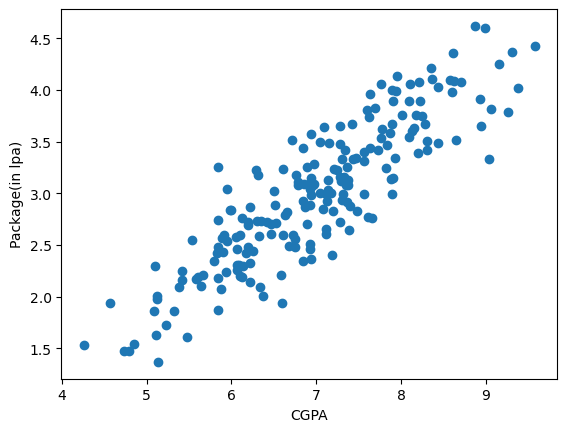

In [5]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'package(in lpa)')

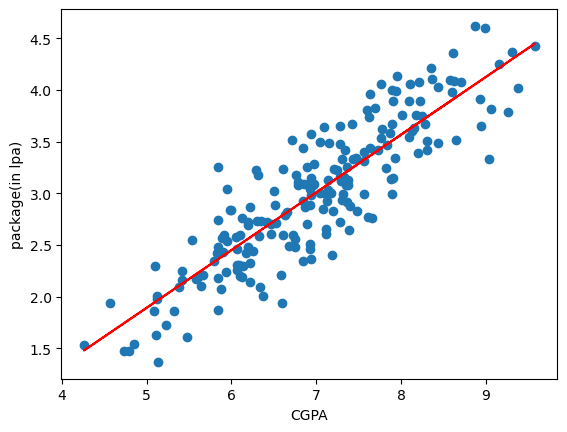

In [12]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [17]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [18]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [19]:
print("R2", r2_score(y_test, y_pred))

R2 0.780730147510384


In [20]:
r2 = r2_score(y_test, y_pred)

# Adjusted R2 Score

In [21]:
X_test.shape

(40, 1)

In [22]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 1))

0.7749598882343415

In [23]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.209427,3.26
1,5.12,0.097390,1.98
2,7.82,0.312743,3.25
3,7.42,0.431445,3.67
4,6.94,0.460004,3.57


Text(0, 0.5, 'package(in lpa)')

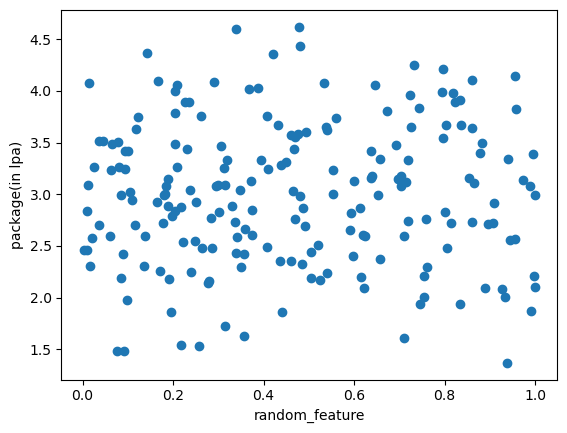

In [24]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')

In [25]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print("R2 Score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score 0.7837864462078599


In [31]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 2))

0.7720992270839604

In [32]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200)/ 10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [33]:
new_df2.sample(5)

,cgpa,iq,package
101,6.71,3.92,3.52
2,7.82,3.75,3.25
47,5.84,4.06,3.26
140,7.91,3.85,3.15
14,7.73,2.62,3.42


Text(0, 0.5, 'package(in lpa)')

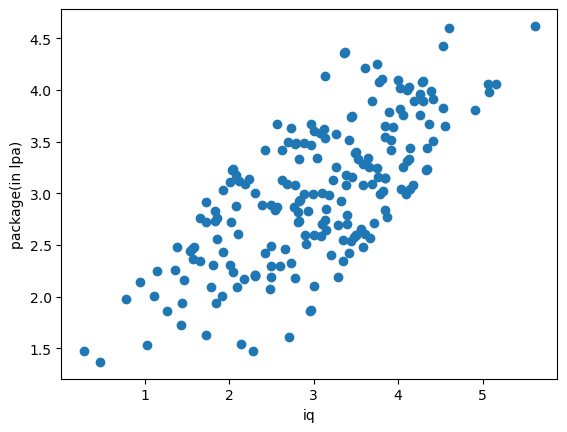

In [34]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [35]:
np.random.randint(-100, 100)

-94

In [36]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [39]:
print("R2 Score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score 0.8610357486514268


In [40]:
1 - ((1 - r2) * (40 - 1) / (40 -1 - 2))

0.85352416749745

In [41]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [42]:
new_df1

,cgpa,random_feature,package
0,6.89,0.209427,3.26
1,5.12,0.097390,1.98
2,7.82,0.312743,3.25
3,7.42,0.431445,3.67
4,6.94,0.460004,3.57
...,...,...,...
195,6.93,0.009118,2.46
196,5.89,0.954580,2.57
197,7.21,0.093552,3.24
198,7.63,0.723296,3.96


In [43]:
new_df2

,cgpa,iq,package
0,6.89,3.26,3.26
1,5.12,0.78,1.98
2,7.82,3.75,3.25
3,7.42,4.37,3.67
4,6.94,3.27,3.57
...,...,...,...
195,6.93,2.66,2.46
196,5.89,3.67,2.57
197,7.21,2.04,3.24
198,7.63,4.26,3.96
